In [172]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
_data = pd.read_excel('/home/angst/DataAnalysis/lab6/Лаб6_7_6_кластер.xlsx')
_data.head(10)

,-0.842499,-4.997976
0,-0.503686,-4.628472
1,-0.927832,-5.570617
2,-0.887718,-4.856050
3,-1.069496,-5.067482
4,-0.539277,-5.357155
5,-0.657533,-5.530931
6,-1.172148,-4.915937
7,-0.957709,-4.655496
8,-0.577739,-4.843265
9,-0.973964,-5.322866


In [174]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   -0.8424987805936923  2499 non-null   float64
 1   -4.997975611767273   2499 non-null   float64
dtypes: float64(2)
memory usage: 39.2 KB


In [175]:
_data.columns = ['x', 'y']
_data.head(10)

,x,y
0,-0.503686,-4.628472
1,-0.927832,-5.570617
2,-0.887718,-4.856050
3,-1.069496,-5.067482
4,-0.539277,-5.357155
5,-0.657533,-5.530931
6,-1.172148,-4.915937
7,-0.957709,-4.655496
8,-0.577739,-4.843265
9,-0.973964,-5.322866


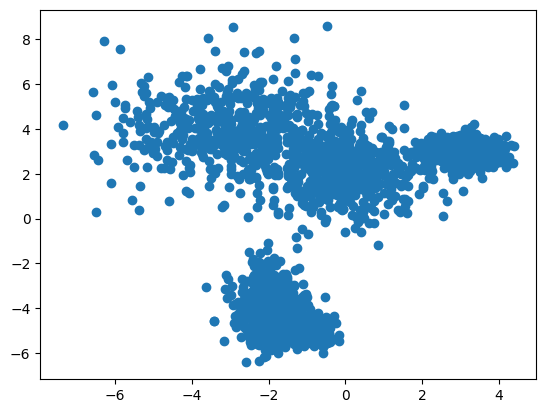

In [176]:
x_values = _data['x'].to_numpy()
y_values = _data['y'].to_numpy()

plt.scatter(x_values, y_values)
plt.show()

In [177]:
k = 4

clusters = {}
np.random.seed(15)

for idx in range(k):
    center = 2*(2*np.random.random((x_values.shape[0],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([ 1.39527079, -1.2844163 , -1.78254714, ..., -0.23742557,
          0.20895644, -0.17171673], shape=(2499,)),
  'points': []},
 1: {'center': array([ 1.78102539,  1.72362685,  1.05306274, ...,  0.79946719,
          0.33006401, -1.90203651], shape=(2499,)),
  'points': []},
 2: {'center': array([-0.70784086, -0.2016309 , -0.75566647, ...,  0.01278747,
          1.00837233,  1.1051917 ], shape=(2499,)),
  'points': []},
 3: {'center': array([-0.51339403, -0.15793436,  0.93700065, ..., -0.38281221,
          1.17977932, -0.235448  ], shape=(2499,)),
  'points': []}}

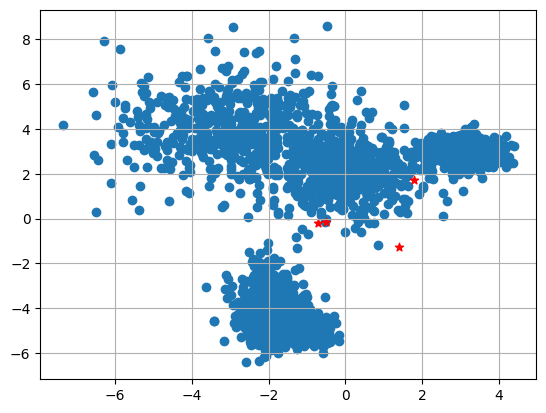

In [178]:
plt.scatter(x_values, y_values)
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')
plt.show()

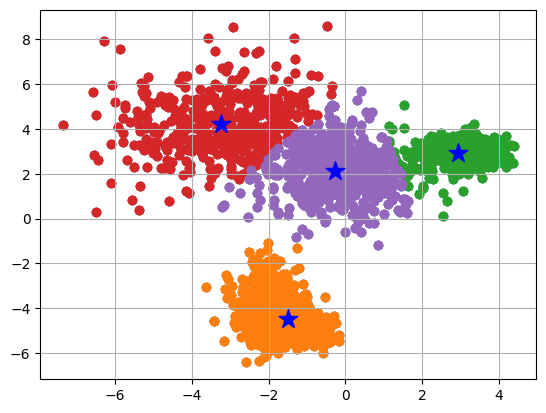

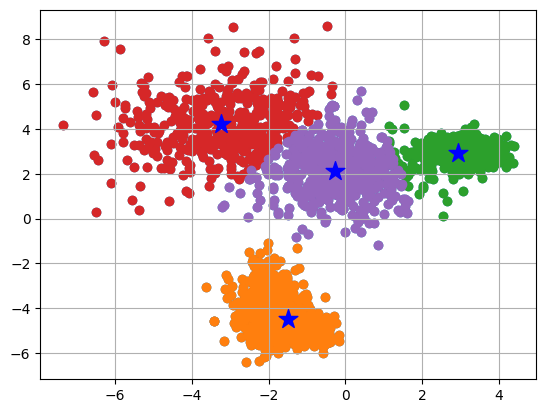

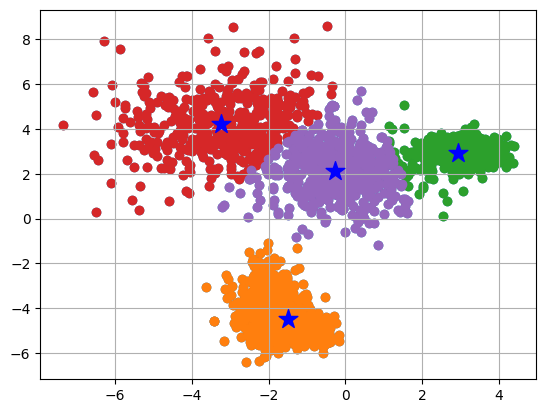

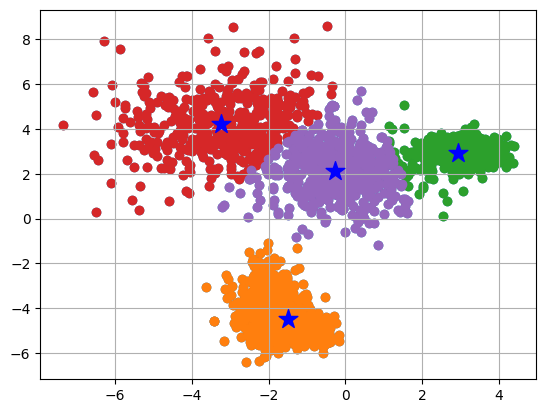

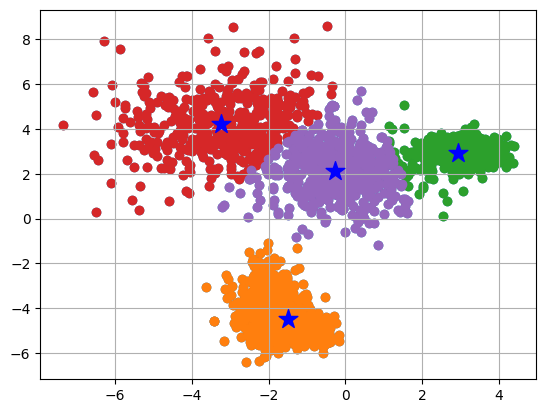

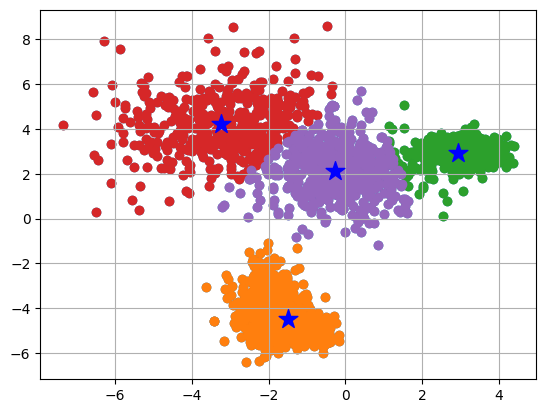

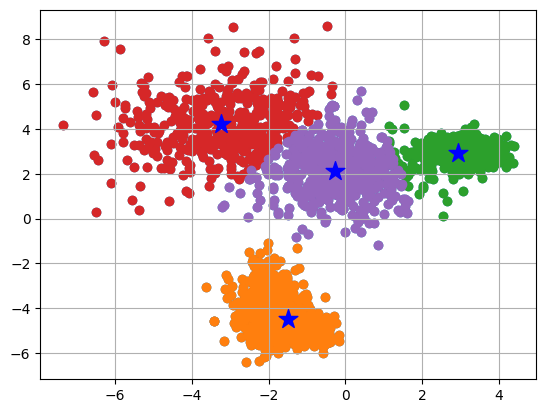

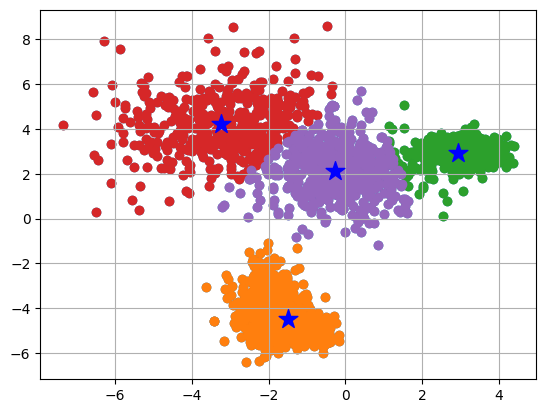

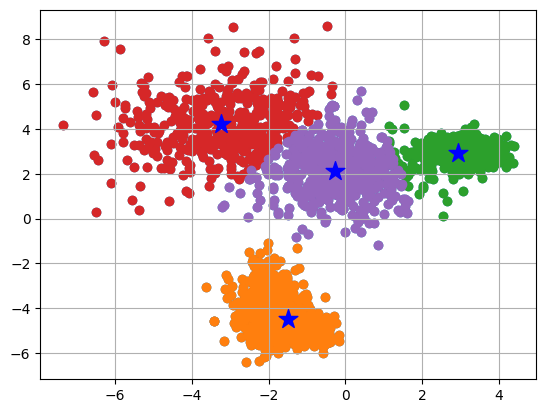

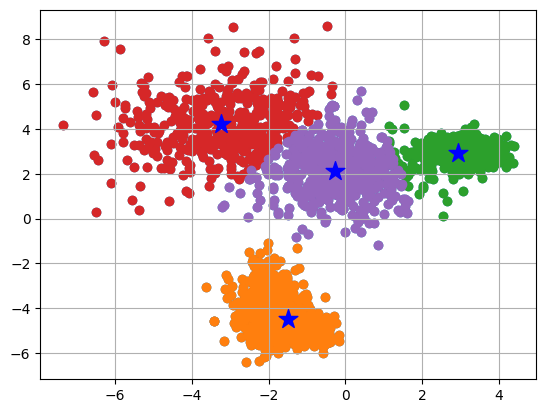

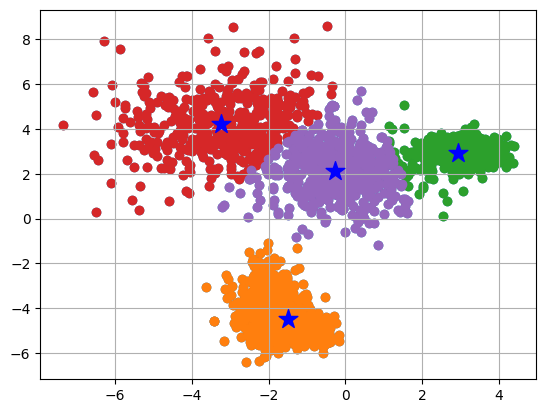

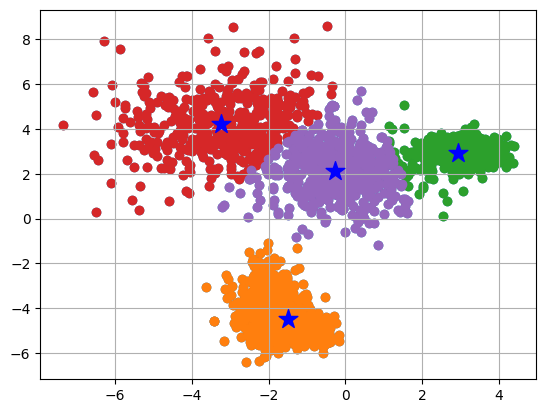

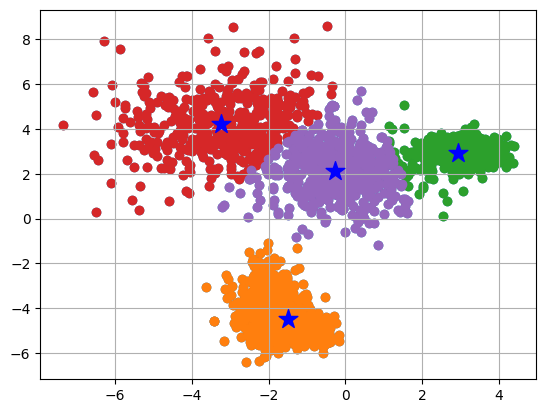

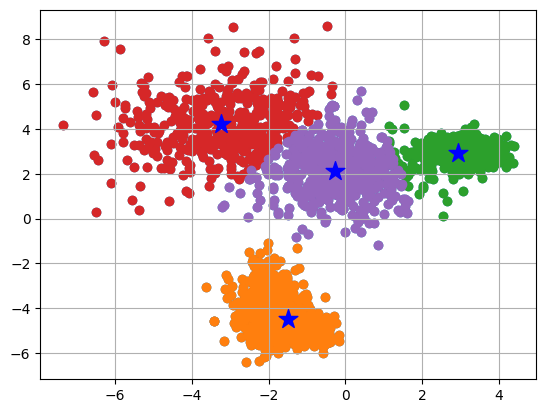

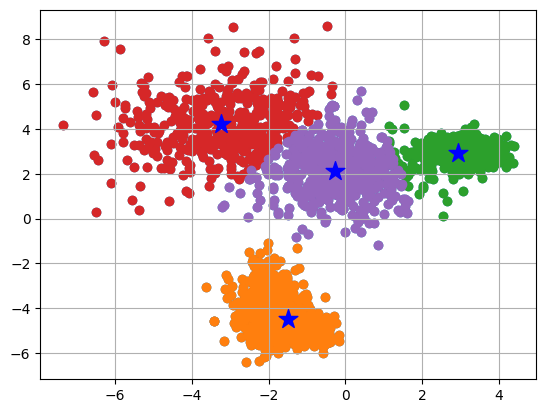

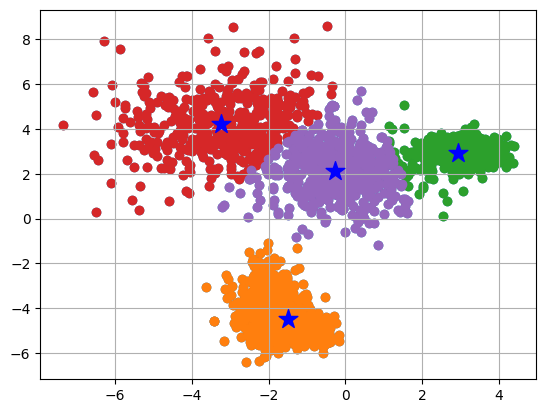

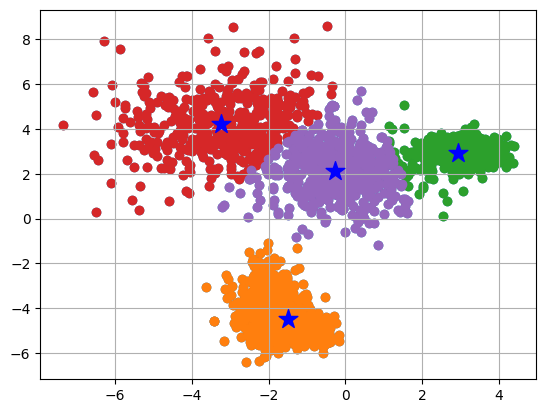

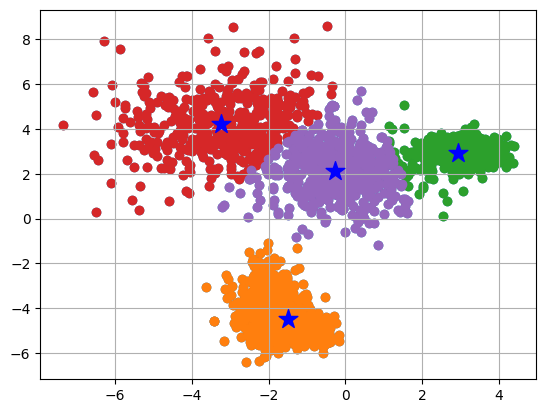

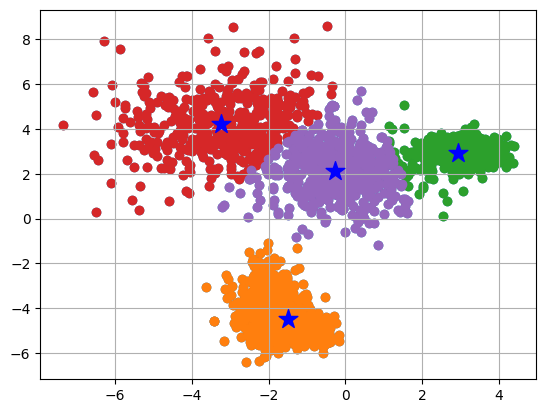

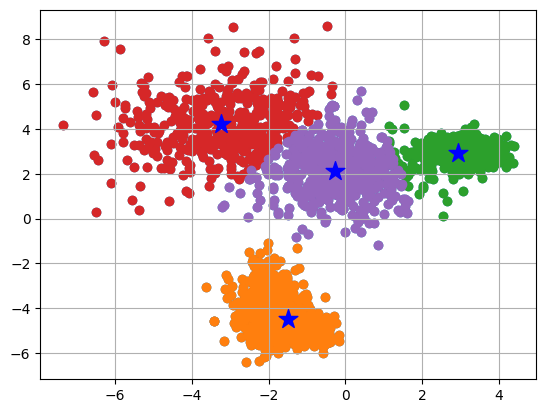

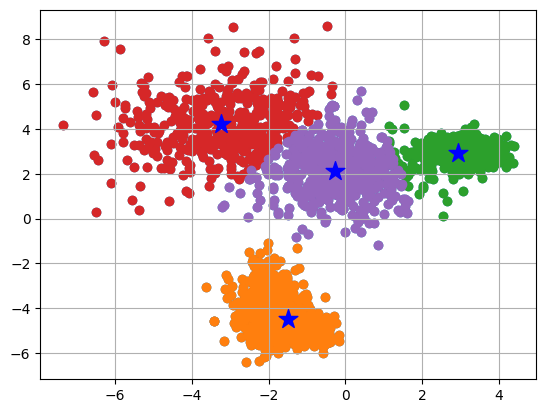

[-1.49160128 -4.49309205]
[2.94730734 2.92753258]
[-3.23068262  4.23786696]
[-0.27645468  2.10523041]


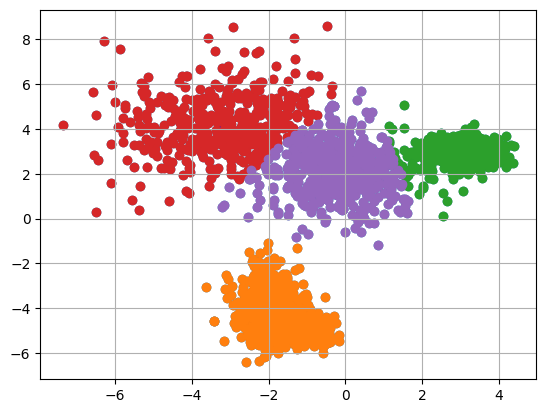

In [ ]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2[:2]) ** 2))

def assign_points_to_clusters(clusters, x_values, y_values):
    for idx in range(x_values.shape[0]):
        point = np.array([x_values[idx], y_values[idx]])
        min_distance = float('inf')
        cluster_id = -1
        for i in clusters:
            center = clusters[i]['center']
            dist = distance(point, center)
            if dist < min_distance:
                min_distance = dist
                cluster_id = i
        clusters[cluster_id]['points'].append(point)
    return clusters

def update_clusters(clusters):
    for i in clusters:
        points = np.array(clusters[i]['points'])
        new_center = np.mean(points, axis=0)
        clusters[i]['center'] = new_center
        clusters[i]['points'] = []
    return clusters

def plot_clusters(clusters):
    plt.scatter(x_values, y_values)
    plt.grid(True)
    
    for i in clusters:
        points = np.array(clusters[i]['points'])
        plt.scatter(points[:, 0], points[:, 1])
    
    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], marker='*', c='blue', s=200, zorder=10)
    
    plt.show()

clusters = assign_points_to_clusters(clusters, x_values, y_values)
plot_clusters(clusters)

for i in range(20):
    clusters = update_clusters(clusters)
    clusters = assign_points_to_clusters(clusters, x_values, y_values)
    plot_clusters(clusters)

for i in clusters:
    print(clusters[i]['center'])

plt.scatter(x_values, y_values)
plt.grid(True)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='blue')
    points = np.array(clusters[i]['points'])
    plt.scatter(points[:, 0], points[:, 1])
plt.show()

